1) Необходимо подготовить изображение (любую картинку на ваш выбор из интернета) и свернуть ее с заготовленными мной фильтрами. Объяснить смысл каждой из сверток сделать копию кода можно отсюда:



https://colab.research.google.com/drive/1quHlOuHcA9ExAfscaev7iCSvWJetCf-u





In [0]:
import numpy as np
import urllib
# from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

import cv2
import collections


In [0]:
# url='http://www.renemagritte.org/images/paintings/the-lovers-2.jpg'
# url='https://github.com/HaruAtari/blog-sources/blob/master/26/source.jpg?raw=true'
# url = 'https://www.statworx.com/wp-content/uploads/train_images.png'
# url = 'https://www.statworx.com/wp-content/uploads/images-from-code.jpeg'
url = 'https://cdn-sv1.deepsense.ai/wp-content/uploads/2017/11/Deep-Learning-metaphors-ConvNet-layers-as-Jenga-blocks.jpg'


response = requests.get(url)
img = Image.open(BytesIO(response.content))
ima = np.asanyarray(img)

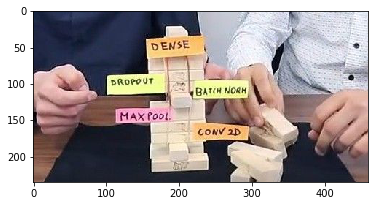

In [0]:
plt.imshow(ima)

In [0]:
kernels = collections.OrderedDict(

# Размытие - Гауссовское (3)
g_fil_3 = (1/16.)*np.array([[1,2,1],                           
                            [2,4,2],
                            [1,2,1]])
,
    
# Детектирует углы - добавляет еффект объемности, выпуклости
emboss =         np.array([[-2,-1, 0],
                           [-1, 1, 1],
                           [ 0, 1, 2]])
,

# Детектирует скачки яркости
edge8 =          np.array([[-1,-1,-1],
                           [-1, 8,-1],
                           [-1,-1,-1]])
,
    
# Детекция вертикальных границ, подавляются пиксели где нет изменения яркости
bl2whR =          np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
,
    
# Детекция вертикальных границ, подавляются пиксели где нет изменения яркости
bl2wh5R =           np.array([[-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2],
                             [-2, -1, 0, 1, 2]])

,

# Детектирует вертикальные полосы
wline5  =          np.array([[-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5],
                             [-2.5, 1, 3, 1, -2.5]])
,
    
# Добавляет точечные шум в местах перехода яркости
sharp =          np.array([[ 0,-1, 0],
                           [-1, 5,-1],
                           [ 0,-1, 0]])
,
    
# Добавляет точечные шум в местах перехода яркости
ssharp =          np.array([[-0.5,-1, -0.5],
                            [-1,   7,   -1],
                            [-0.5,-1, -0.5]])
,
    
# Размытие - Гауссовское (5) - больше размытие чем у (3)
g_fil_5 = (1/256.)*np.array([[1, 4, 6, 4,1],
                             [4,16,24,16,4],
                             [6,24,36,24,6],
                             [4,16,24,16,4],
                             [1, 4, 6, 4,1]])
,
    
# Размытие - скользящее среднее (3)
blur_box_3 = (1/9.)*np.array([[1,1,1],
                              [1,1,1],
                              [1,1,1]])
,
    
# находи паттерн с "Х" с яркояй точкой внутри 
my_fil =     np.array([[1,-1, 1],
                       [-1,8,-1],
                       [1,-1, 1]])
,
    
# Размытие - скользящее среднее (5) - больше размытие чем у (3)
blur_box_5 = (1/25.)*np.array([[1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1],
                               [1, 1, 1, 1, 1]])
)

In [0]:
def convolution(image, filtr):
    image = image.astype('float')
    image_shape = image.shape
    filtr_shape = filtr.shape
    gap = int(filtr_shape[0]/2)
    output_image = np.array(image.copy())
    output_image = output_image[0:(image_shape[0]-(gap+1)),0:(image_shape[1]-(gap+1))]
    for i in range(gap,(image_shape[0]-gap-1)):
        for j in range(gap, (image_shape[1]-gap-1)):
            for k in range(3):
                pixel = ((image[(i-gap):(i+gap+1),(j-gap):(j+gap+1),k])*filtr).sum().sum()
                if pixel > 255:
                    pixel = 255
                if pixel < 0:
                    pixel = 0
                output_image[i][j][k] = pixel
    return output_image.astype('uint8')
  
def show_2_in_row(origin, after_filter,name=''):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.title('Orign')
    plt.imshow(origin)
    plt.subplot(1, 2, 2)
    plt.title(name)
    plt.imshow(after_filter)
    plt.show()

In [0]:
for i in kernels:
    print(kernels[i],kernels[i].sum(),kernels[i].mean())
    plt.figure(figsize=(2,2))
    plt.title(i)
    plt.imshow(kernels[i])
    after_filter  = convolution(ima, kernels[i])
#     after_filter  = cv2.filter2D(ima, -1, kernels[i])
#     chanal = 0
#     show_2_in_row(ima[:,:,chanal],after_filter[:,:,chanal],i)
    show_2_in_row(ima,after_filter,i)


Output hidden; open in https://colab.research.google.com to view.